# <span style="color:rgb(255, 0, 255)">Code for the mid-projet Tapas group. Looking at most expensive houses</span> 

## 0 | Define the problem </span>


Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above. **This will be analyzed also through SQL.

## 1 | Gather data </span>

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [2]:
data = pd.read_csv('table_SQL_650.csv')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
1,1736800520,2015-04-03,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
2,2524049179,2014-08-26,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
3,1794500383,2014-06-26,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000
4,3303700376,2014-12-01,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,667000


## 2 | Pre-process data </span>

### <span style="color:rgb(255, 0, 255)">--- First explorations (head, shape, info).

In [3]:
data.shape

(5205, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5205 non-null   int64  
 1   date           5205 non-null   object 
 2   bedrooms       5205 non-null   int64  
 3   bathrooms      5205 non-null   float64
 4   sqft_living    5205 non-null   int64  
 5   sqft_lot       5205 non-null   int64  
 6   floors         5205 non-null   float64
 7   waterfront     5205 non-null   int64  
 8   view           5205 non-null   int64  
 9   condition      5205 non-null   int64  
 10  grade          5205 non-null   int64  
 11  sqft_above     5205 non-null   int64  
 12  sqft_basement  5205 non-null   int64  
 13  yr_built       5205 non-null   int64  
 14  yr_renovated   5205 non-null   int64  
 15  zipcode        5205 non-null   int64  
 16  lat            5205 non-null   float64
 17  long           5205 non-null   float64
 18  sqft_liv

In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,5.205000e+03,5205.000000,5205.000000,5205.000000,5.205000e+03,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.00000,5205.000000,5205.000000,5205.000000,5.205000e+03
mean,4.509665e+09,3.830355,2.687752,3020.285495,2.139565e+04,1.717099,0.025552,0.634774,3.462440,8.869933,2553.876273,466.409222,1972.919116,161.707205,98073.549856,47.61964,-122.202455,2633.483766,16316.703746,9.986294e+05
std,2.939103e+09,0.889473,0.791278,1028.934611,6.068848e+04,0.493068,0.157811,1.204710,0.688646,1.224819,985.331592,575.318460,32.576260,545.172471,51.315744,0.07463,0.135115,783.978510,35350.065948,4.807615e+05
min,3.600072e+06,1.000000,0.750000,890.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,580.000000,0.000000,1900.000000,0.000000,98001.000000,47.15930,-122.514000,860.000000,967.000000,6.501000e+05
25%,1.931300e+09,3.000000,2.250000,2350.000000,5.401000e+03,1.000000,0.000000,0.000000,3.000000,8.000000,1770.000000,0.000000,1951.000000,0.000000,98033.000000,47.57080,-122.312000,2030.000000,5300.000000,7.300000e+05
50%,3.885803e+09,4.000000,2.500000,2910.000000,8.616000e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2460.000000,0.000000,1981.000000,0.000000,98074.000000,47.62980,-122.209000,2590.000000,8437.000000,8.350000e+05
75%,7.308600e+09,4.000000,3.250000,3520.000000,1.455000e+04,2.000000,0.000000,0.000000,4.000000,10.000000,3180.000000,890.000000,2001.000000,0.000000,98115.000000,47.67290,-122.106000,3150.000000,13068.000000,1.060000e+06
max,9.839301e+09,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.77640,-121.691000,6210.000000,871200.000000,7.700000e+06


In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [7]:
# Let's see nans
data.isna().sum() 
#There are none! (haha)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

***

### <span style="color:rgb(255, 0, 255)">--- Check for the format of date columns</span>

In [8]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

### <span style="color:rgb(255, 0, 255)">--- Check for the kind of features that we have</span>

<span style="color:rgb(255, 0, 255)">They are not categorical values, lets explore each column to know how to treat them (specially the discrete ones)</span>

In [9]:
for col in data.columns:
    print(data[col].value_counts())

3630120700    2
2619920170    2
7856400300    2
8129700644    2
3528000040    2
             ..
3275850190    1
1025049174    1
2487700130    1
4217400185    1
7936000429    1
Name: id, Length: 5188, dtype: int64
2014-06-26    40
2014-06-20    38
2015-04-27    36
2015-04-23    36
2015-03-25    35
              ..
2014-08-10     1
2014-09-13     1
2015-05-09     1
2015-02-14     1
2014-11-01     1
Name: date, Length: 337, dtype: int64
4     2513
3     1548
5      742
2      228
6      135
7       20
8        8
1        5
9        4
10       2
Name: bedrooms, dtype: int64
2.50    1472
2.75     525
3.50     520
2.25     456
1.75     406
3.25     396
3.00     327
2.00     285
1.00     175
1.50     158
3.75     132
4.00     117
4.50      81
4.25      74
4.75      21
5.00      17
5.25      11
5.50      10
6.00       6
5.75       3
6.75       2
8.00       2
0.75       2
1.25       2
6.25       2
6.50       2
7.75       1
Name: bathrooms, dtype: int64
3190    35
2440    35
3010    34
2620    3

In [10]:
#Inspired by Luis's Code
#Check unique values for each value
for column in data.columns:
    print('─' * 10)
    print("This feature ", '\033[1m' + column + '\033[0m' ," has ", data[column].nunique(), " categories \n The single values are: ", data[column].unique(),"\n" )
    print("Here the detail: \n" , data[column].value_counts())
    print("\n\n")

──────────
This feature  id  has  5188  categories 
 The single values are:  [7237550310 1736800520 2524049179 ... 7202300110  249000205 7936000429] 

Here the detail: 
 3630120700    2
2619920170    2
7856400300    2
8129700644    2
3528000040    2
             ..
3275850190    1
1025049174    1
2487700130    1
4217400185    1
7936000429    1
Name: id, Length: 5188, dtype: int64



──────────
This feature  date  has  337  categories 
 The single values are:  ['2014-05-12' '2015-04-03' '2014-08-26' '2014-06-26' '2014-12-01'
 '2015-03-02' '2014-06-24' '2014-06-13' '2014-08-11' '2014-07-07'
 '2014-10-28' '2014-07-16' '2015-03-11' '2015-03-03' '2014-08-27'
 '2014-09-09' '2014-06-12' '2014-09-12' '2014-11-05' '2015-03-23'
 '2014-11-14' '2014-12-23' '2014-09-08' '2014-06-11' '2014-12-12'
 '2014-10-07' '2015-03-05' '2014-11-21' '2015-01-02' '2014-06-18'
 '2015-04-28' '2015-01-26' '2014-06-27' '2014-12-03' '2014-06-25'
 '2015-04-01' '2015-03-04' '2015-03-24' '2014-06-05' '2015-01-16'
 '2014-0

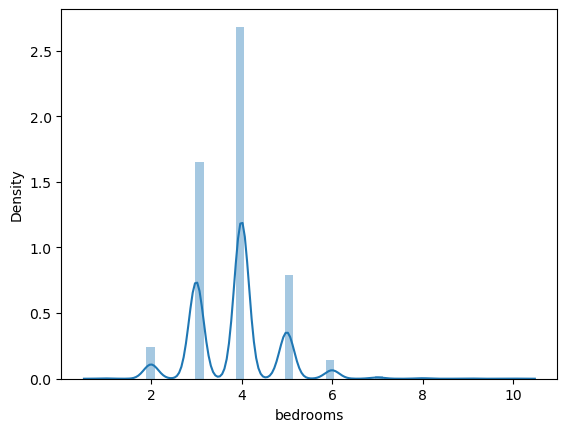

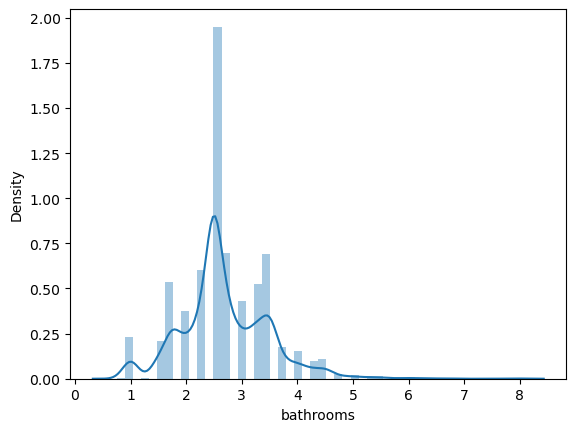

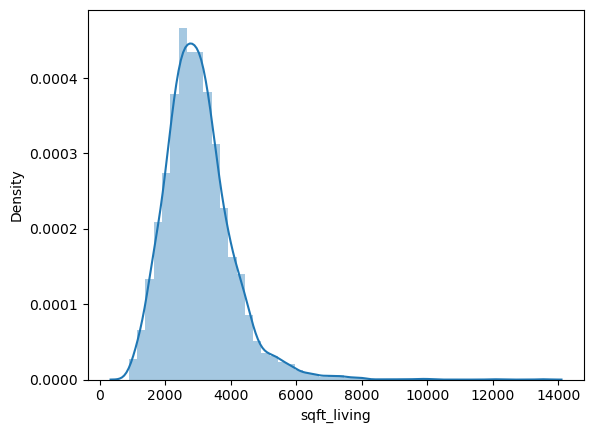

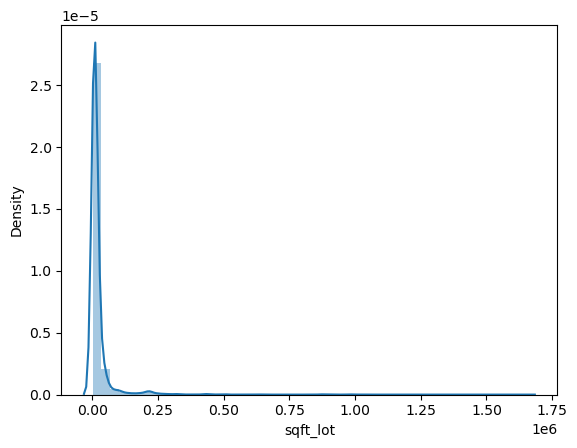

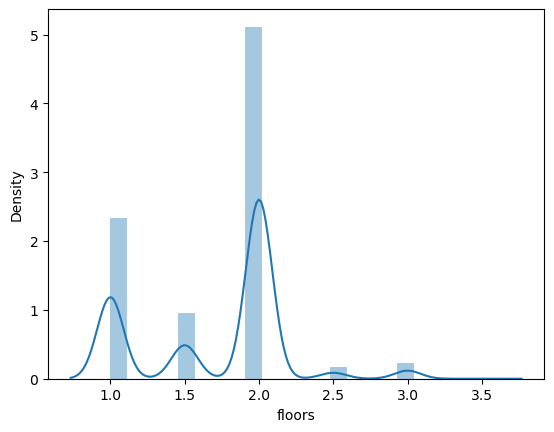

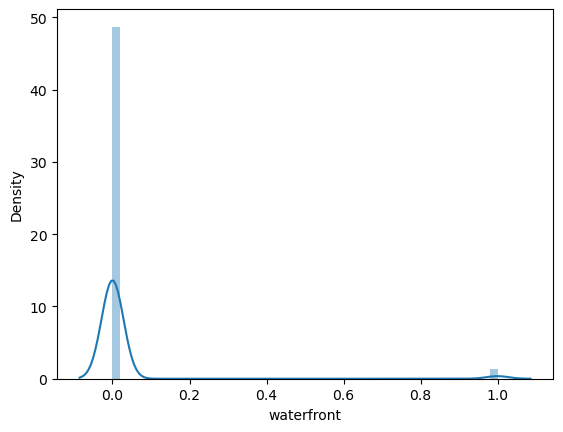

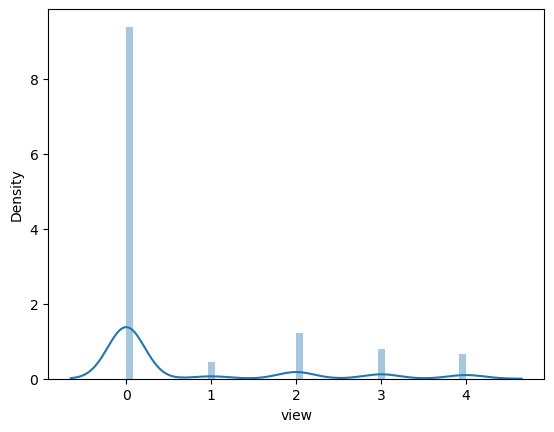

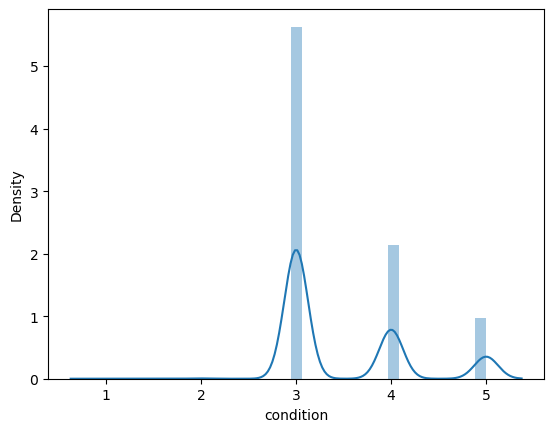

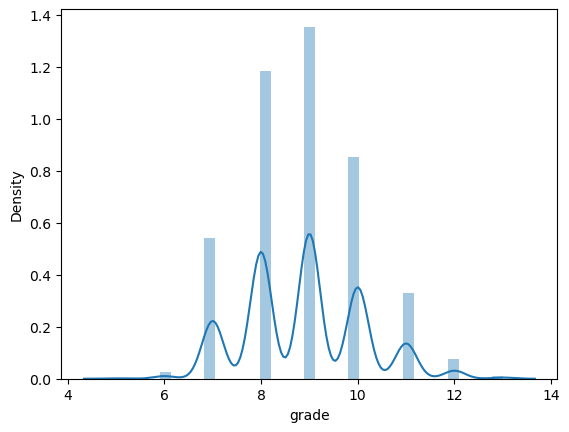

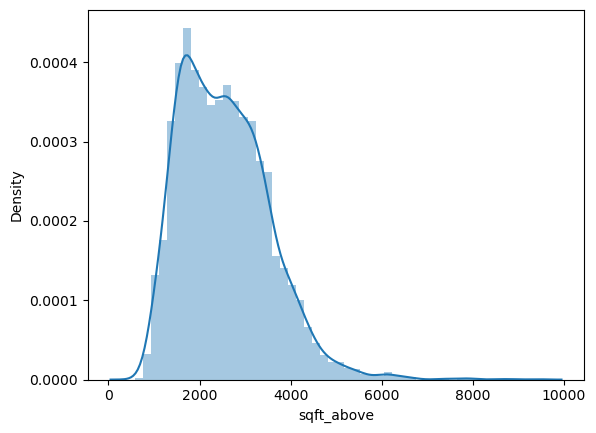

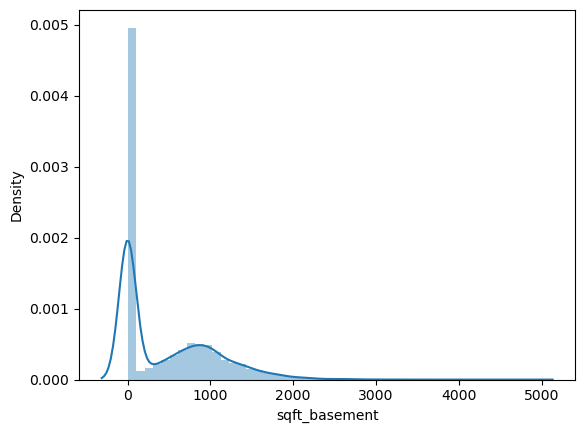

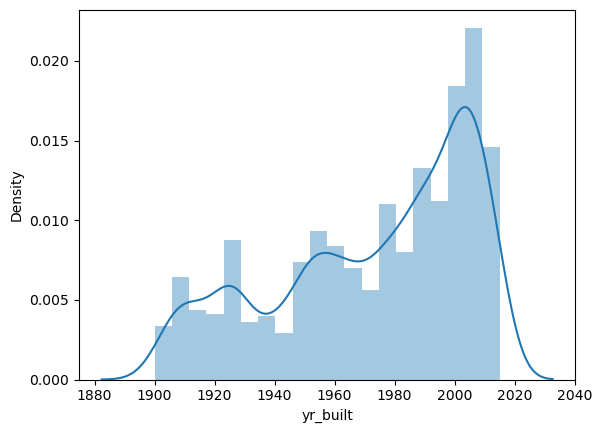

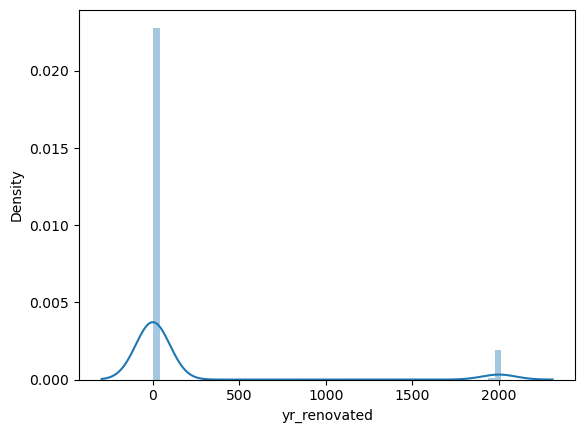

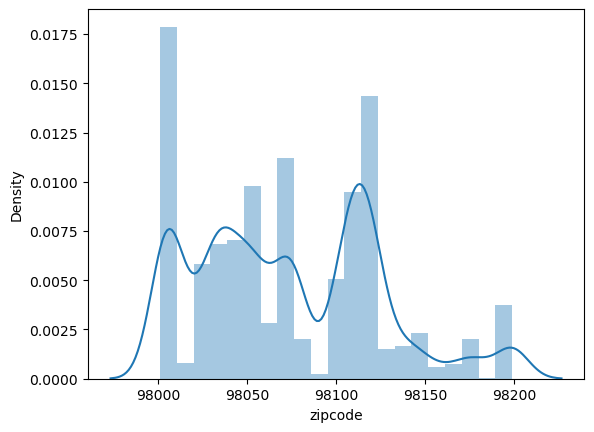

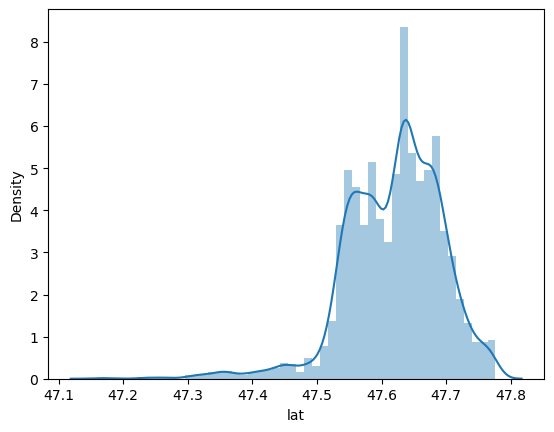

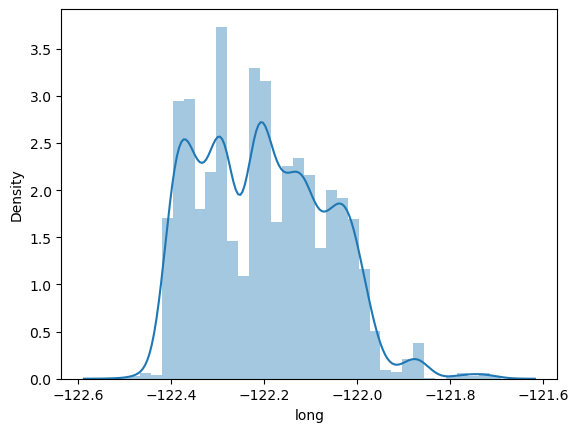

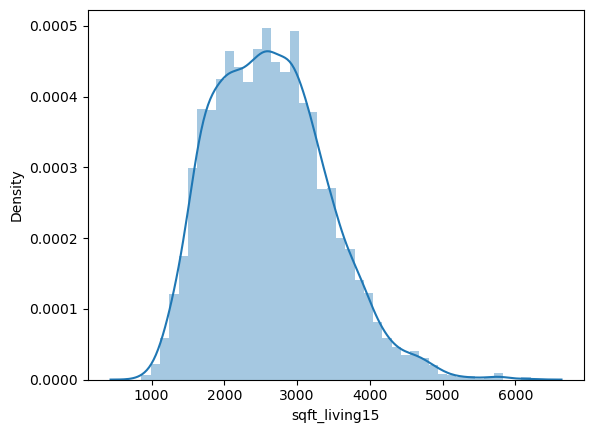

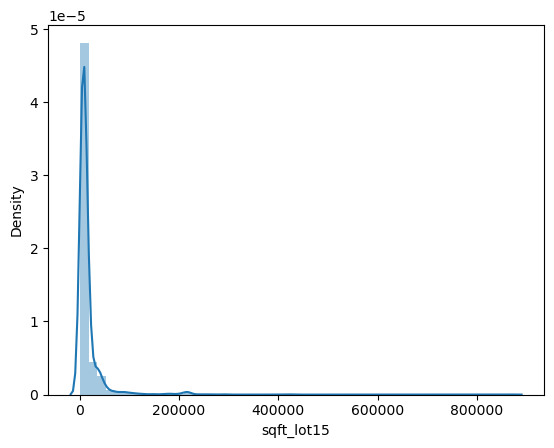

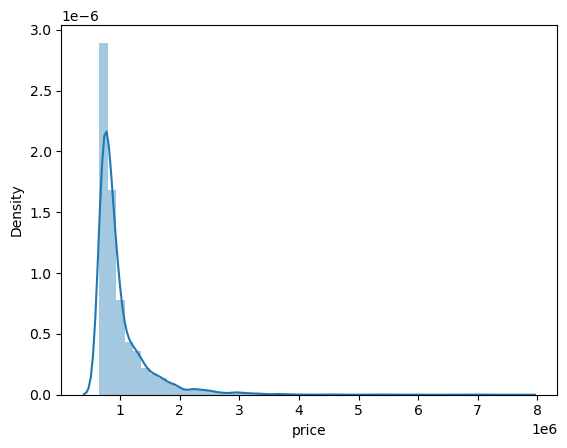

In [11]:
df = data.copy()
df = df.drop(columns = ["id", "date"], axis = 1)
for column in df:
    sns.distplot(df[column])
    plt.show() 

In [26]:
X = df.copy()
X = X.drop(columns = ["price"], axis = 1)
Y = df[["price"]]


In [27]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [31]:
scaler = StandardScaler().fit(X)
X_num_scaled = scaler.transform(X)
X_num_normalized = pd.DataFrame(X_num_scaled,columns=X.columns)

In [32]:
 #let's dive in feature importance of linnear regression model

X_feature = X_num_normalized
y_feature = Y

# create a linear regression object
reg = LinearRegression()

# fit the linear regression model on the data
reg.fit(X_feature, y_feature)

# print the coefficients and their corresponding feature names
coefficients = pd.DataFrame({'feature': X_feature.columns, 'coefficient': reg.coef_})
coefficients = coefficients.sort_values('coefficient', ascending=False)
print(coefficients)

ValueError: Per-column arrays must each be 1-dimensional